# IMPORT LIBRARIES

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

from sklearn.model_selection import GroupKFold
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# SET AND RESET ROWS AND COLS

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

# READ CSV FILE

In [13]:
df1 = pd.read_csv('neurodivergent_data_with_null.csv')
df1

,Participant,Paragraph,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,PP_3_JJS,PP_3_MD,PP_3_VB,PP_3_RB,PP_3_VBZ,PP_3_RBS,PP_3_JJR,PP_3_WRB,PP_3_RBR,TUT
0,593890eac6aa16000101f037,4,0.255628,-0.240734,0.769459,1.160247,0.735440,0.179377,0.603954,1.070321,...,0.0,-0.408349,-0.632643,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,1
1,593890eac6aa16000101f037,10,-0.854289,-0.642084,-0.571281,-0.650087,0.229276,0.381386,-0.419869,-0.098452,...,0.0,-0.408349,-0.632643,-0.935216,0.407957,0.0,-0.408349,-0.408349,0.0,0
2,593890eac6aa16000101f037,15,-0.618389,-0.529584,-0.430915,-0.469494,-0.620504,-0.393668,-0.408860,-0.310040,...,0.0,-0.408349,1.580670,0.935216,2.312831,0.0,2.448884,-0.408349,0.0,0
3,593890eac6aa16000101f037,20,0.214897,0.312642,-0.421235,-0.293306,-0.676059,-0.768827,-0.139144,-0.103490,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,-0.408349,0.0,1
4,593890eac6aa16000101f037,26,0.175863,0.340007,-0.116301,0.037047,0.128454,0.385508,-0.331798,0.113136,...,0.0,-0.408349,-0.632643,1.870432,-0.544481,0.0,-0.408349,-0.408349,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,63e53dc0bb780ac38cdcf77e,15,0.919202,1.160950,-0.595482,-0.610445,0.920622,1.552211,-0.502436,-0.375532,...,0.0,-0.408349,1.580670,0.935216,2.312831,0.0,2.448884,-0.408349,0.0,1
1158,63e53dc0bb780ac38cdcf77e,20,2.663841,2.155203,0.125710,0.728586,-0.223392,0.043330,-0.607020,-0.723141,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,-0.408349,0.0,1
1159,63e53dc0bb780ac38cdcf77e,26,1.850921,2.124798,0.043427,0.728586,1.272468,1.626419,0.174609,0.722711,...,0.0,-0.408349,-0.632643,1.870432,-0.544481,0.0,-0.408349,-0.408349,0.0,0
1160,63e53dc0bb780ac38cdcf77e,31,1.217895,1.832907,-0.576122,-0.531160,3.601647,6.169552,-0.596011,-0.652611,...,0.0,2.448884,1.580670,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,0


In [14]:
df2 = pd.read_csv('Overall_data_m.csv')
df2

,Participant,TUTMean,DisengageMean,AwarenessMean,FMTMean,TextRTMean,TestMean,ReadPrior,OffTaskStuck,OffTaskJump,...,Setting,Race,D1,D2,D3,D4,D5,D6,D7,D8
0,593890eac6aa16000101f037,0.428571,2.000000,5.428571,5.428571,8.150127,0.7,n,4,5,...,1,10,1,0,0,0,1,1,0,0
1,596e1af7a09655000197d4bb,0.000000,3.000000,6.714286,5.000000,8.258325,0.8,n,3,4,...,1,10,0,0,0,0,0,1,0,0
2,5af835d8e19f8c00019e6dc0,0.000000,1.000000,7.000000,6.857143,15.013760,0.8,n,4,3,...,1,10,0,0,0,0,0,1,0,0
3,5b07b71c68eff50001d1c859,0.285714,3.000000,5.000000,4.857143,8.980250,0.6,n,4,4,...,1,7,0,0,0,0,0,0,1,0
4,5bd7971b0aac450001f951aa,0.571429,1.000000,7.000000,7.000000,15.064745,0.8,n,3,3,...,1,10,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,6295270587394aac7ce600db,0.142857,4.000000,3.857143,4.428571,10.930252,0.7,n,4,5,...,1,10,1,0,0,0,1,1,0,0
350,63038702fea51556c37c36cf,0.571429,4.285714,5.142857,5.000000,7.708367,0.7,n,4,5,...,2,10,0,1,0,0,1,0,0,0
351,63d17cf704d2d7053d56b962,0.857143,2.857143,3.571429,3.428571,8.862255,0.8,n,2,2,...,1,10,0,1,0,0,0,0,0,0
352,63d3fa78d12b38b131ef6b76,1.000000,5.285714,7.000000,5.142857,8.167373,0.9,n,4,5,...,1,10,1,1,1,0,1,1,0,0


# FILTER BY DIAGNOSIS

In [17]:
# filter by diagnostics and create new data files for each diagnostic
df2_d1 = df2[df2['D1'] == 1]
df2_d2 = df2[df2['D2'] == 1]
df2_d3 = df2[df2['D3'] == 1]
df2_d4 = df2[df2['D4'] == 1]
df2_d5 = df2[df2['D5'] == 1]
df2_d6 = df2[df2['D6'] == 1]
df2_d7 = df2[df2['D7'] == 1]
df2_d8 = df2[df2['D8'] == 1]
df2_d7_d8 = df2[(df2['D7'] == 1) | (df2['D8'] == 1)]

In [21]:
# #save files
# df2_d1.to_csv("d1.csv", index=False)
# df2_d2.to_csv("d2.csv", index=False)
# df2_d3.to_csv("d3.csv", index=False)
# df2_d4.to_csv("d4.csv", index=False)
# df2_d5.to_csv("d5.csv", index=False)
# df2_d6.to_csv("d6.csv", index=False)
# df2_d7.to_csv("d7.csv", index=False)
# df2_d8.to_csv("d8.csv", index=False)
# df2_d7_d8.to_csv("d7_d8.csv", index=False)

In [13]:
# read csv
df2_d1 = pd.read_csv("d1.csv")
df2_d2 = pd.read_csv("d2.csv")
df2_d3 = pd.read_csv("d3.csv")
df2_d4 = pd.read_csv("d4.csv")
df2_d5 = pd.read_csv("d5.csv")
df2_d6 = pd.read_csv("d6.csv")
df2_d7 = pd.read_csv("d7.csv")
df2_d8 = pd.read_csv("d8.csv")


In [16]:
# filter by diagnostics
filter_d1 = pd.merge(df1, df2_d1[['Participant']], on=['Participant'], how = 'inner')
filter_d2 = pd.merge(df1, df2_d2[['Participant']], on=['Participant'], how = 'inner')
filter_d3 = pd.merge(df1, df2_d3[['Participant']], on=['Participant'], how = 'inner')
filter_d4 = pd.merge(df1, df2_d4[['Participant']], on=['Participant'], how = 'inner')
filter_d5 = pd.merge(df1, df2_d5[['Participant']], on=['Participant'], how = 'inner')
filter_d6 = pd.merge(df1, df2_d6[['Participant']], on=['Participant'], how = 'inner')
filter_d7 = pd.merge(df1, df2_d7[['Participant']], on=['Participant'], how = 'inner')
filter_d8 = pd.merge(df1, df2_d8[['Participant']], on=['Participant'], how = 'inner')


In [32]:
# # save files
# filter_d1.to_csv("d1_null.csv", index=False)
# filter_d2.to_csv("d2_null.csv", index=False)
# filter_d3.to_csv("d3_null.csv", index=False)
# filter_d4.to_csv("d4_null.csv", index=False)
# filter_d5.to_csv("d5_null.csv", index=False)
# filter_d6.to_csv("d6_null.csv", index=False)
# filter_d7.to_csv("d7_null.csv", index=False)
# filter_d8.to_csv("d8_null.csv", index=False)

# REMOVE NULL VALUES

In [33]:
df_d1 = pd.read_csv('d1_null.csv')
df_d2 = pd.read_csv('d2_null.csv')
df_d3 = pd.read_csv('d3_null.csv')
df_d4 = pd.read_csv('d4_null.csv')
df_d5 = pd.read_csv('d5_null.csv')
df_d6 = pd.read_csv('d6_null.csv')
df_d7 = pd.read_csv('d7_null.csv')
df_d8 = pd.read_csv('d8_null.csv')

In [31]:
# # check for null values in each column
# df_d1.isnull().sum()
# df_d2.isnull().sum()
# df_d3.isnull().sum()
# df_d4.isnull().sum()
# df_d5.isnull().sum()
# df_d6.isnull().sum()
# df_d7.isnull().sum()
# df_d8.isnull().sum()

In [34]:
# remove null values
d1_no_null = df_d1.dropna()
d2_no_null = df_d2.dropna()
d3_no_null = df_d3.dropna()
d4_no_null = df_d4.dropna()
d5_no_null = df_d5.dropna()
d6_no_null = df_d6.dropna()
d7_no_null = df_d7.dropna()
d8_no_null = df_d8.dropna()


In [35]:
# save files
d1_no_null.to_csv("d1_no_null.csv", index=False)
d2_no_null.to_csv("d2_no_null.csv", index=False)
d3_no_null.to_csv("d3_no_null.csv", index=False)
d4_no_null.to_csv("d4_no_null.csv", index=False)
d5_no_null.to_csv("d5_no_null.csv", index=False)
d6_no_null.to_csv("d6_no_null.csv", index=False)
d7_no_null.to_csv("d7_no_null.csv", index=False)
d8_no_null.to_csv("d8_no_null.csv", index=False)

# MODELING

In [24]:
df_d1 = pd.read_csv('d1_no_null.csv')
df_d2 = pd.read_csv('d2_no_null.csv')
df_d3 = pd.read_csv('d3_no_null.csv')
df_d4 = pd.read_csv('d4_no_null.csv')
df_d5 = pd.read_csv('d5_no_null.csv')
df_d6 = pd.read_csv('d6_no_null.csv')
df_d7 = pd.read_csv('d7_no_null.csv')
df_d8 = pd.read_csv('d8_no_null.csv')

## ADD or ADHD

Majority class 1
Minority class 1
Number of components that explain 95% of the variance: 12


<Figure size 1100x700 with 0 Axes>

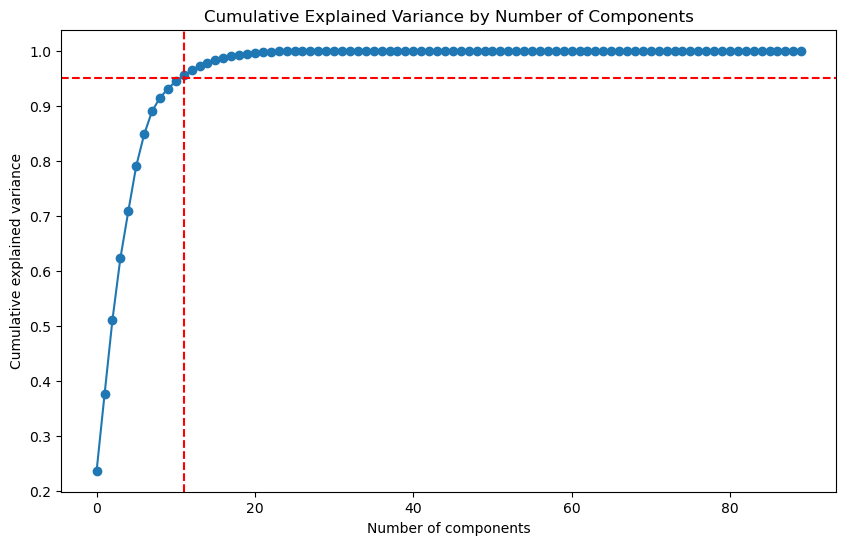

Chance Results:
Avg Accuracy: 0.50
Avg Weighted F1 Score: 0.50
Avg Precision_1: 0.50
Avg Recall_1: 0.55
Avg AUROC: 0.51
Avg Confusion Matrix:
[[19.6 23.2]
 [19.6 23.2]]
Avg Prediction Rate: 0.54

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.57
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.57
Avg Recall_1: 0.60
Avg AUROC: 0.58
Avg Confusion Matrix:
[[24.  18.8]
 [17.6 25.2]]
Avg Prediction Rate: 0.51

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

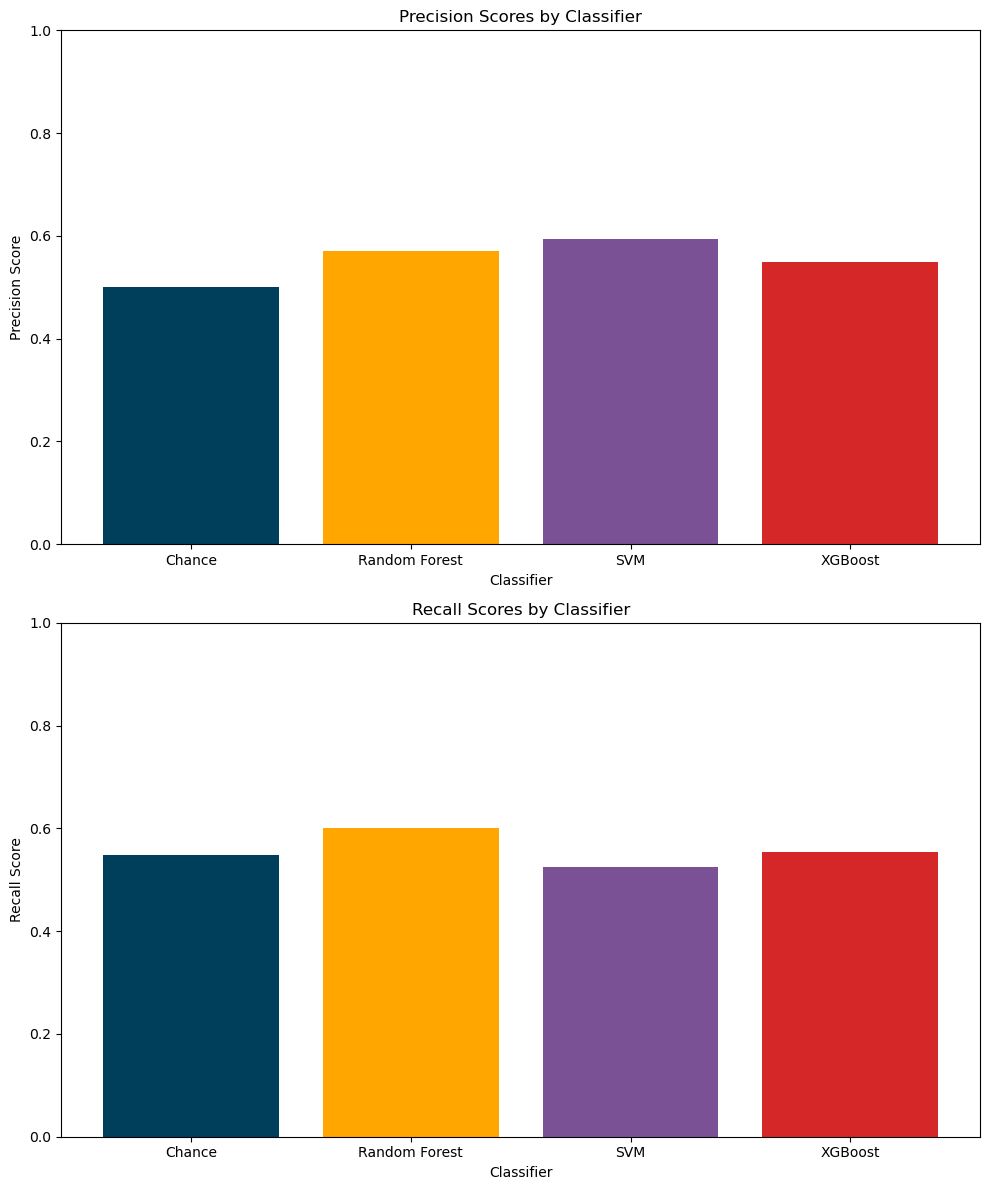

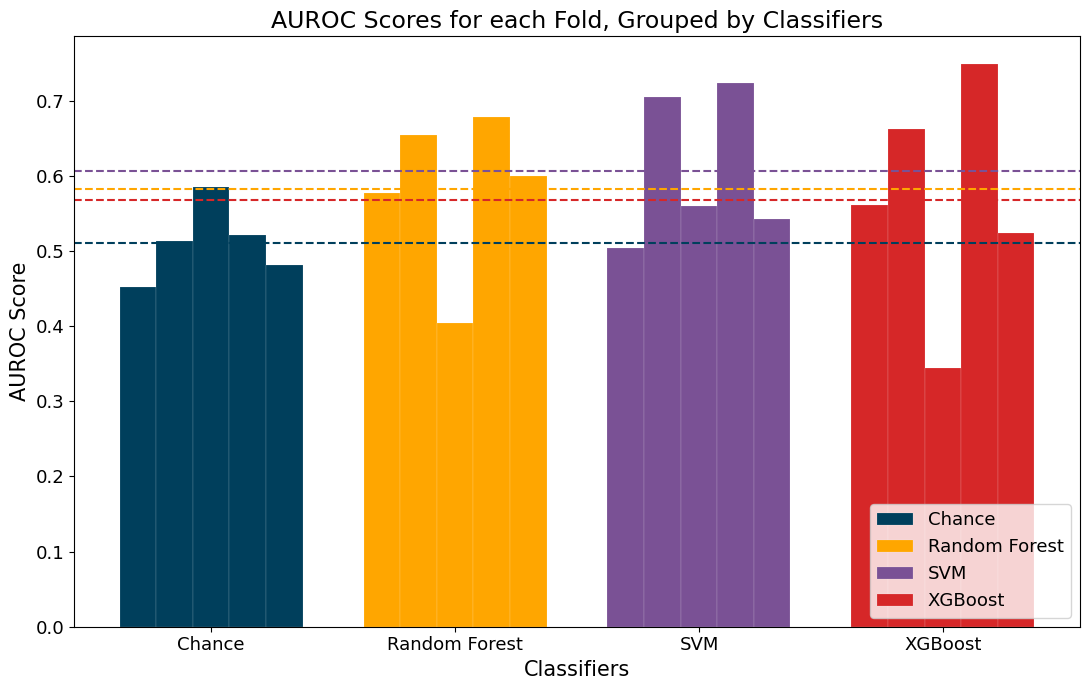

In [25]:
#AUROC
# Preparing the data
X = df_d1.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

y = df_d1['TUT']

# Identify majority and minority classes
majority_class = df_d1['TUT'].value_counts().idxmax()
minority_class = df_d1['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = df_d1[df_d1['TUT'] == majority_class].index
minority_indices = df_d1[df_d1['TUT'] == minority_class].index

# precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Fit PCA to determine the number of components that explain 95% of the variance
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# # Plot cumulative explained variance to visually inspect
# plt.figure(figsize=(10, 6))
# plt.plot(cumulative_variance, marker='o')
# plt.axhline(y=0.95, color='r', linestyle='--')
# plt.axvline(x=n_components - 1, color='r', linestyle='--')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title('Cumulative Explained Variance by Number of Components')
# plt.show()

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=df_d1['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


## Autism, Asperger’s, or ASD

Majority class 0
Minority class 1
Number of components that explain 95% of the variance: 11


<Figure size 1100x700 with 0 Axes>

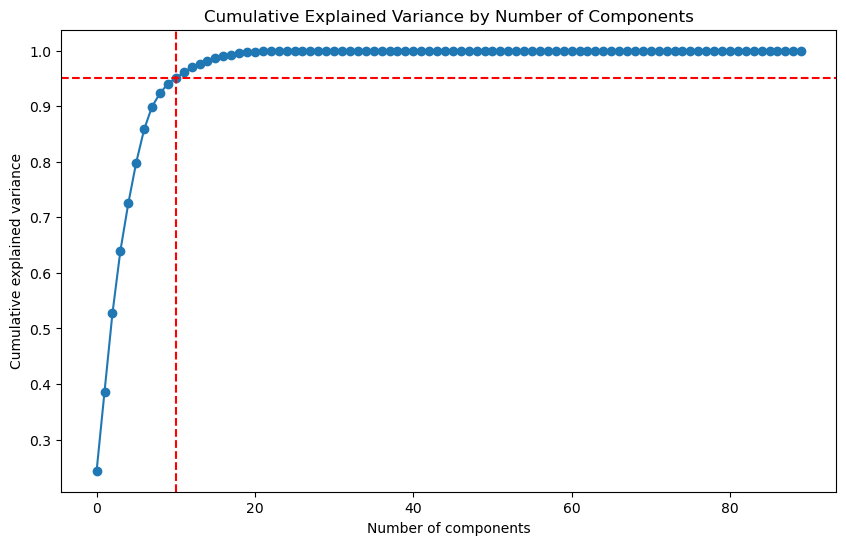

Chance Results:
Avg Accuracy: 0.51
Avg Weighted F1 Score: 0.51
Avg Precision_1: 0.47
Avg Recall_1: 0.45
Avg AUROC: 0.46
Avg Confusion Matrix:
[[24.  18.8]
 [19.4 15.6]]
Avg Prediction Rate: 0.44

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.51
Avg Weighted F1 Score: 0.51
Avg Precision_1: 0.46
Avg Recall_1: 0.49
Avg AUROC: 0.53
Avg Confusion Matrix:
[[22.8 20. ]
 [18.  17. ]]
Avg Prediction Rate: 0.48

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

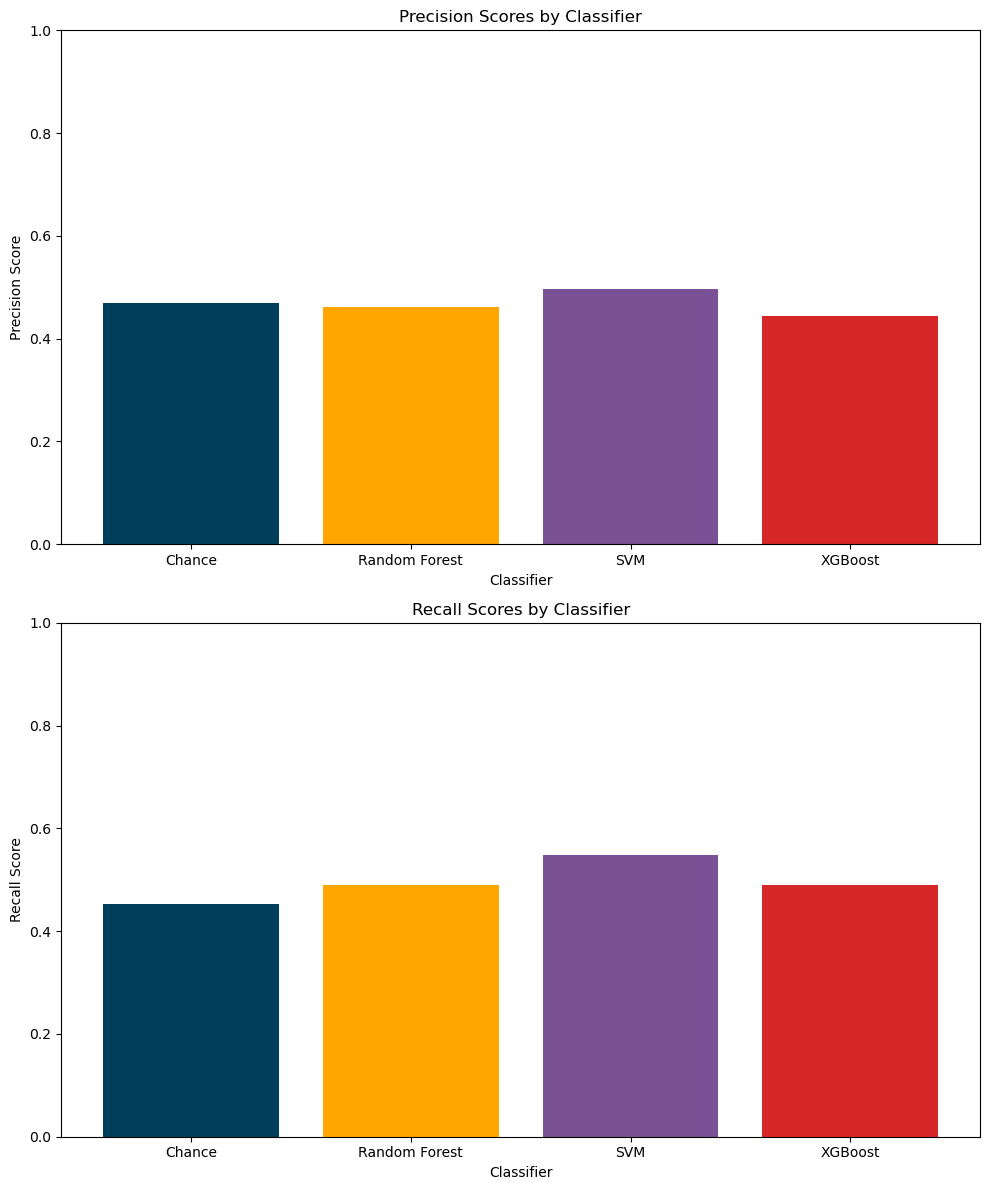

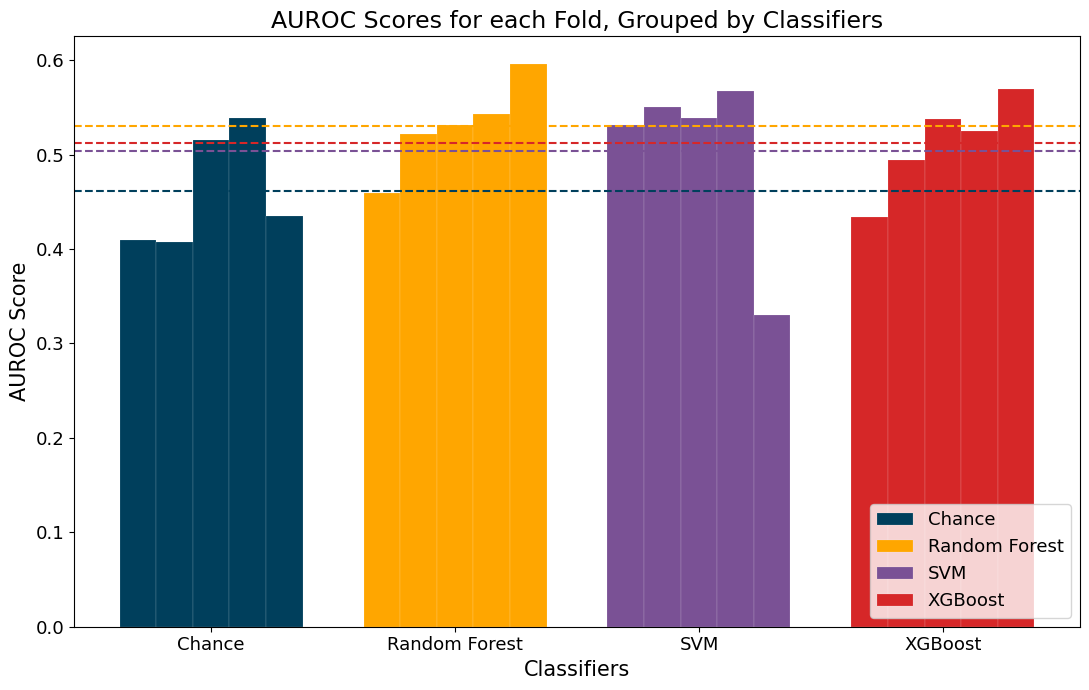

In [40]:
#AUROC
# Preparing the data
X = df_d2.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

y = df_d2['TUT']

# Identify majority and minority classes
majority_class = df_d2['TUT'].value_counts().idxmax()
minority_class = df_d2['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = df_d2[df_d2['TUT'] == majority_class].index
minority_indices = df_d2[df_d2['TUT'] == minority_class].index

# precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Fit PCA to determine the number of components that explain 95% of the variance
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# Plot cumulative explained variance to visually inspect
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=df_d2['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


## Dyslexia, Dyspraxia, Dyscalculia, Dysgraphia

Majority class 1
Minority class 0
Number of components that explain 95% of the variance: 9


<Figure size 1100x700 with 0 Axes>

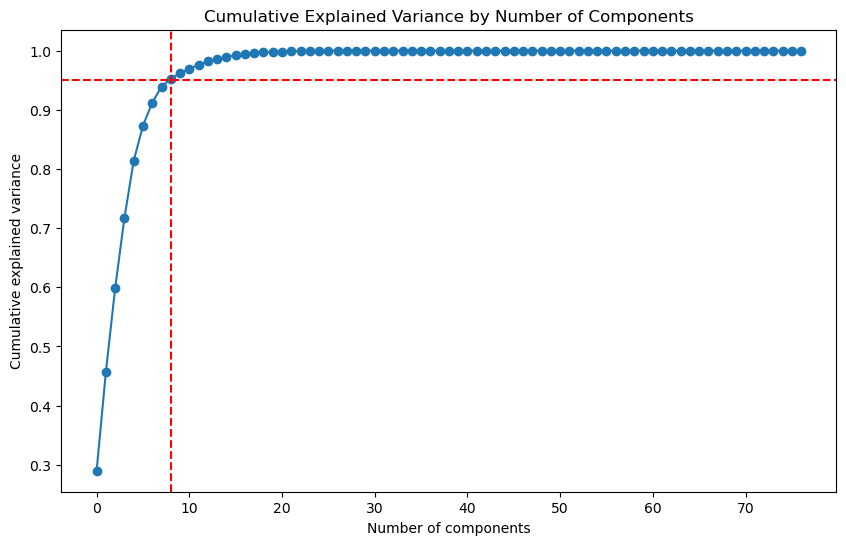

Chance Results:
Avg Accuracy: 0.44
Avg Weighted F1 Score: 0.45
Avg Precision_1: 0.49
Avg Recall_1: 0.54
Avg AUROC: 0.49
Avg Confusion Matrix:
[[2.  4.8]
 [3.8 4.8]]
Avg Prediction Rate: 0.63

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.54
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.55
Avg Recall_1: 0.50
Avg AUROC: 0.52
Avg Confusion Matrix:
[[3.8 3. ]
 [4.  4.6]]
Avg Prediction Rate: 0.49

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

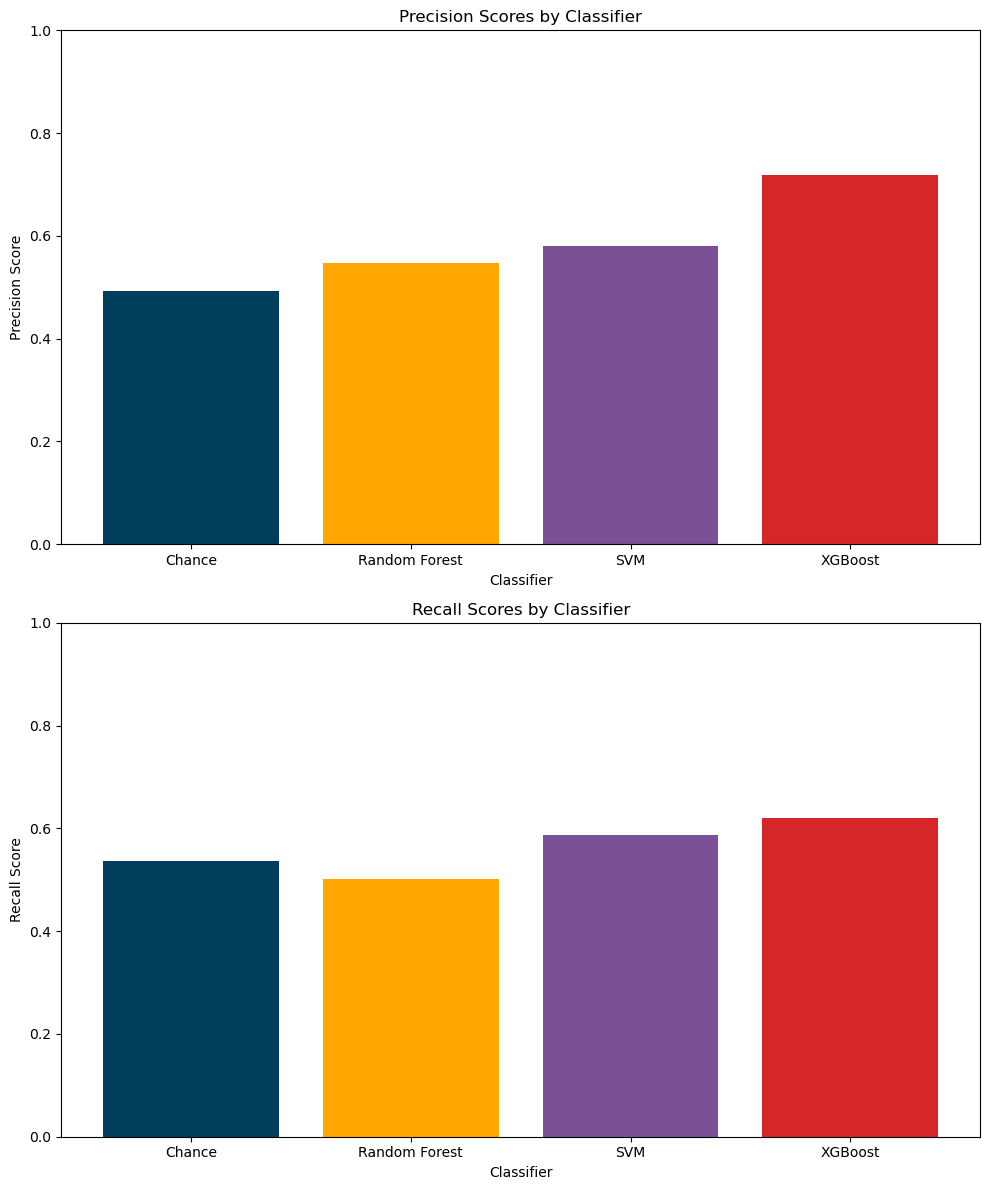

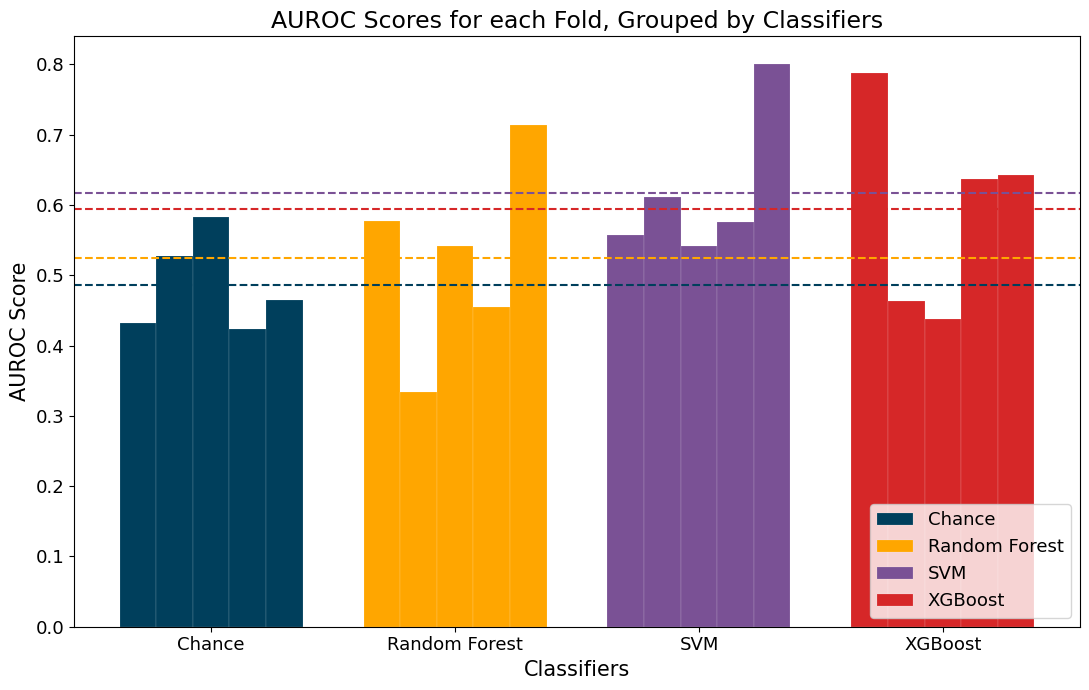

In [41]:
#AUROC
# Preparing the data
X = df_d3.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

y = df_d3['TUT']

# Identify majority and minority classes
majority_class = df_d3['TUT'].value_counts().idxmax()
minority_class = df_d3['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = df_d3[df_d3['TUT'] == majority_class].index
minority_indices = df_d3[df_d3['TUT'] == minority_class].index

# precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Fit PCA to determine the number of components that explain 95% of the variance
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# Plot cumulative explained variance to visually inspect
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=df_d3['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


## Any other language, reading, math, and nonverbal learning disorder

Majority class 0
Minority class 1
Number of components that explain 95% of the variance: 10


<Figure size 1100x700 with 0 Axes>

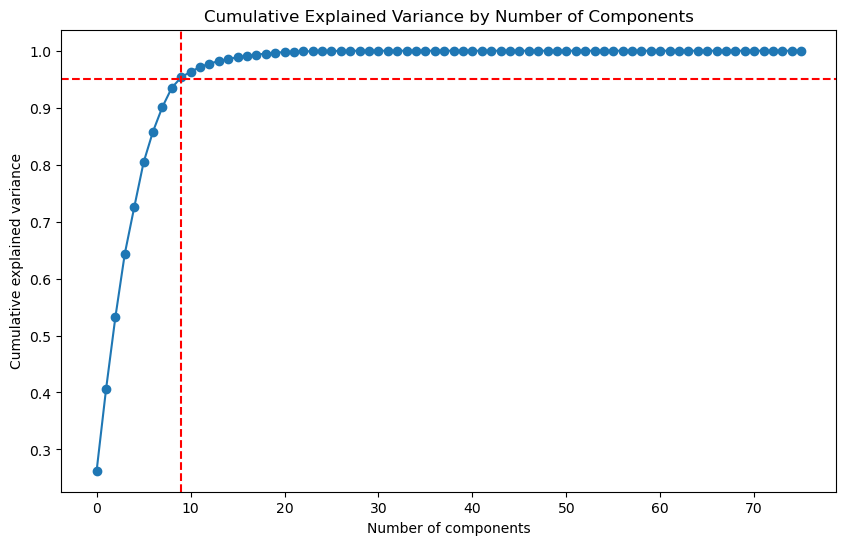

Chance Results:
Avg Accuracy: 0.42
Avg Weighted F1 Score: 0.41
Avg Precision_1: 0.35
Avg Recall_1: 0.38
Avg AUROC: 0.48
Avg Confusion Matrix:
[[4.2 4.4]
 [4.4 2.2]]
Avg Prediction Rate: 0.44

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.59
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.56
Avg Recall_1: 0.50
Avg AUROC: 0.53
Avg Confusion Matrix:
[[5.6 3. ]
 [3.2 3.4]]
Avg Prediction Rate: 0.41

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

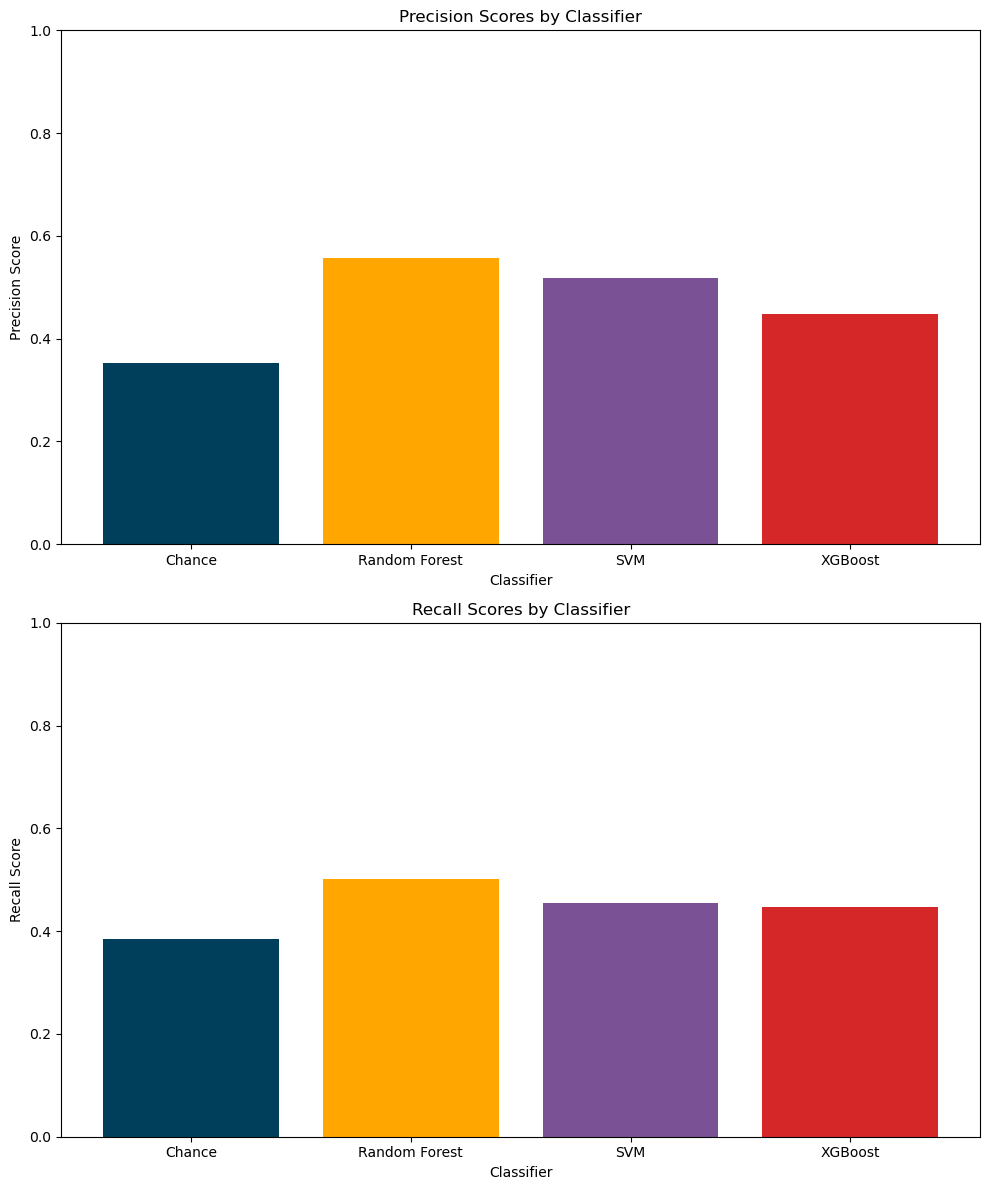

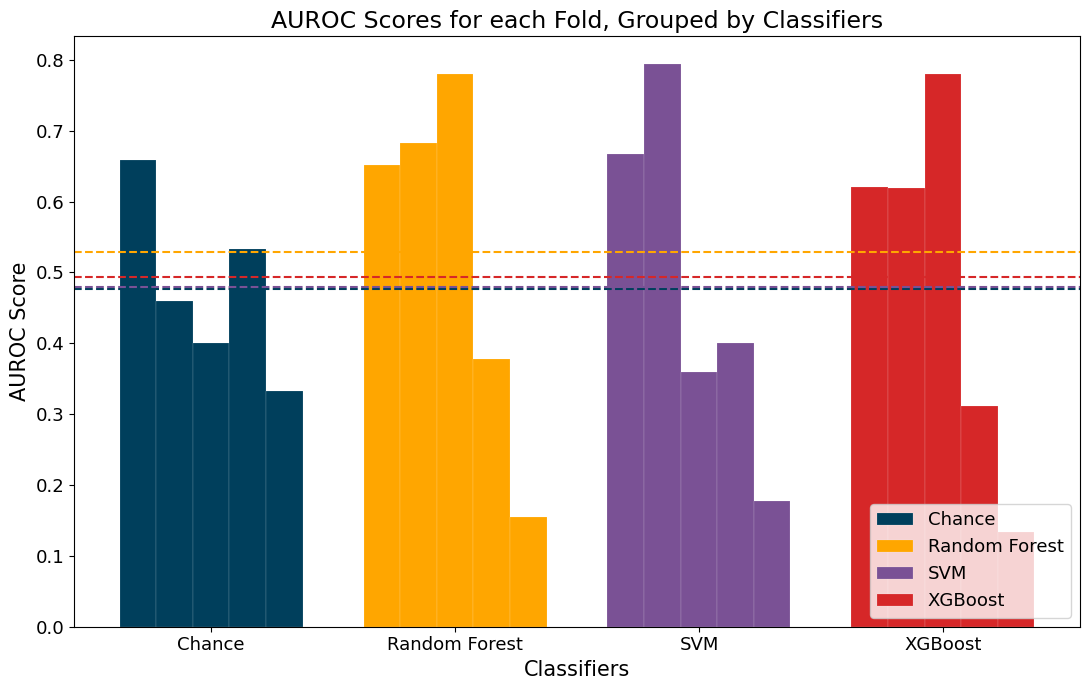

In [42]:
#AUROC
# Preparing the data
X = df_d4.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

y = df_d4['TUT']

# Identify majority and minority classes
majority_class = df_d4['TUT'].value_counts().idxmax()
minority_class = df_d4['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = df_d4[df_d4['TUT'] == majority_class].index
minority_indices = df_d4[df_d4['TUT'] == minority_class].index

# precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Fit PCA to determine the number of components that explain 95% of the variance
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# Plot cumulative explained variance to visually inspect
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=df_d4['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


## Generalized anxiety disorder

Majority class 0
Minority class 1
Number of components that explain 95% of the variance: 12


<Figure size 1100x700 with 0 Axes>

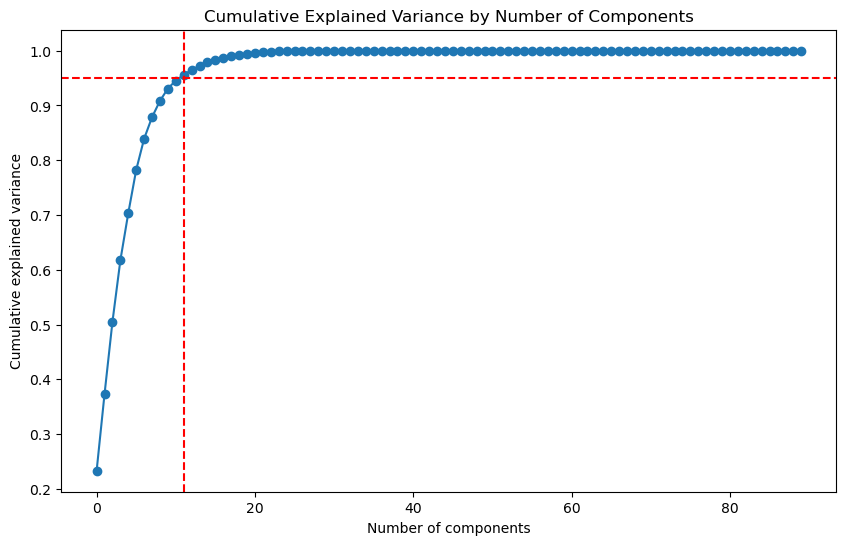

Chance Results:
Avg Accuracy: 0.52
Avg Weighted F1 Score: 0.52
Avg Precision_1: 0.45
Avg Recall_1: 0.45
Avg AUROC: 0.53
Avg Confusion Matrix:
[[32.  23.6]
 [23.6 19.2]]
Avg Prediction Rate: 0.44

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.54
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.47
Avg Recall_1: 0.48
Avg AUROC: 0.57
Avg Confusion Matrix:
[[32.6 23. ]
 [22.2 20.6]]
Avg Prediction Rate: 0.44

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

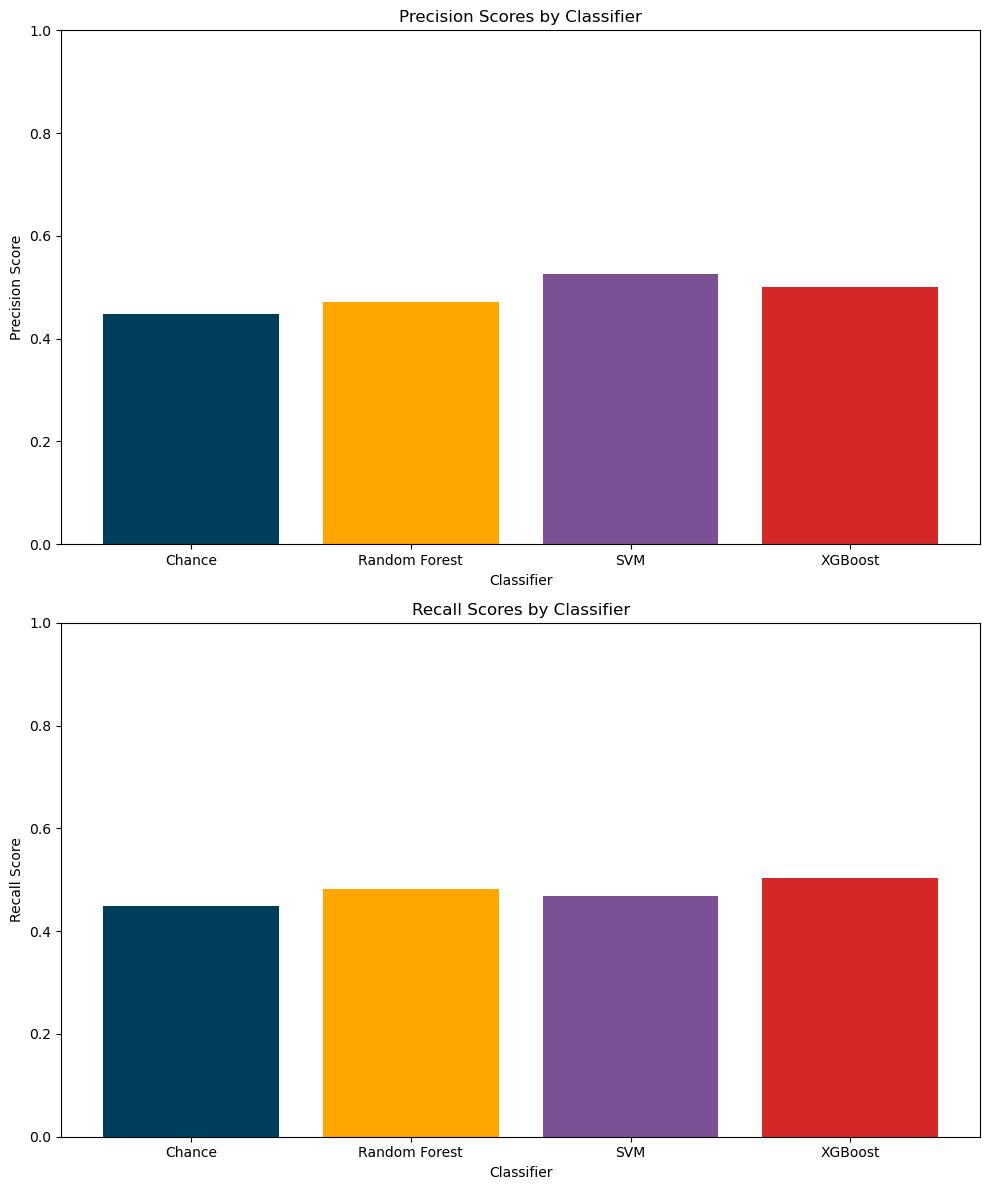

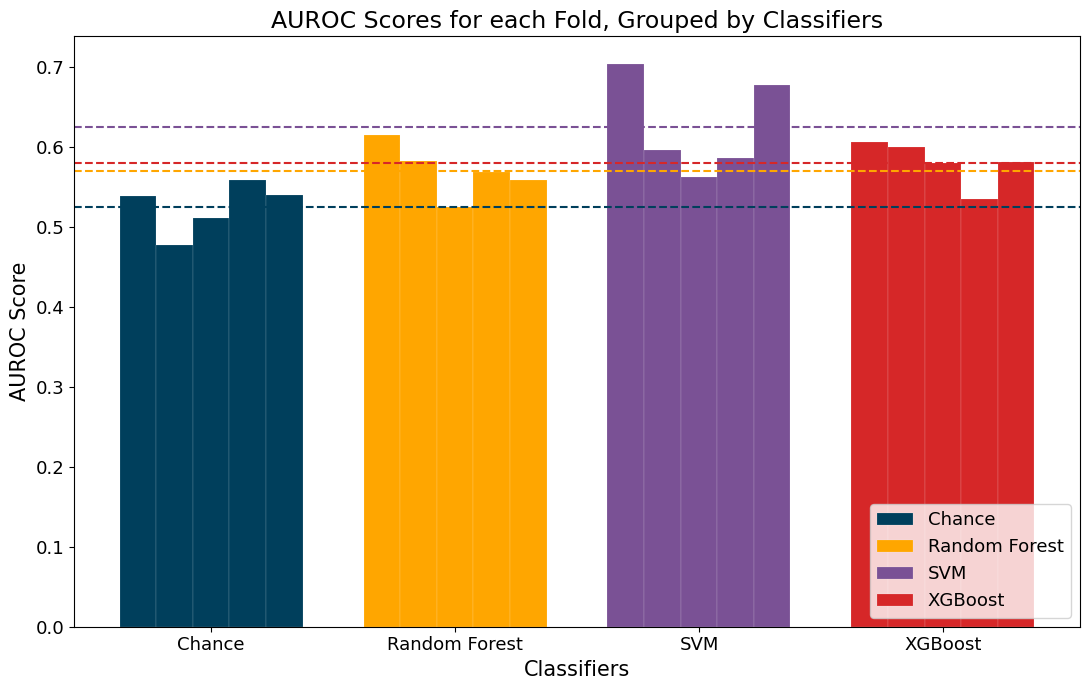

In [43]:
#AUROC
# Preparing the data
X = df_d5.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

y = df_d5['TUT']

# Identify majority and minority classes
majority_class = df_d5['TUT'].value_counts().idxmax()
minority_class = df_d5['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = df_d5[df_d5['TUT'] == majority_class].index
minority_indices = df_d5[df_d5['TUT'] == minority_class].index

# precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Fit PCA to determine the number of components that explain 95% of the variance
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# Plot cumulative explained variance to visually inspect
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=df_d5['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


## Other

Majority class 0
Minority class 1
Number of components that explain 95% of the variance: 11


<Figure size 1100x700 with 0 Axes>

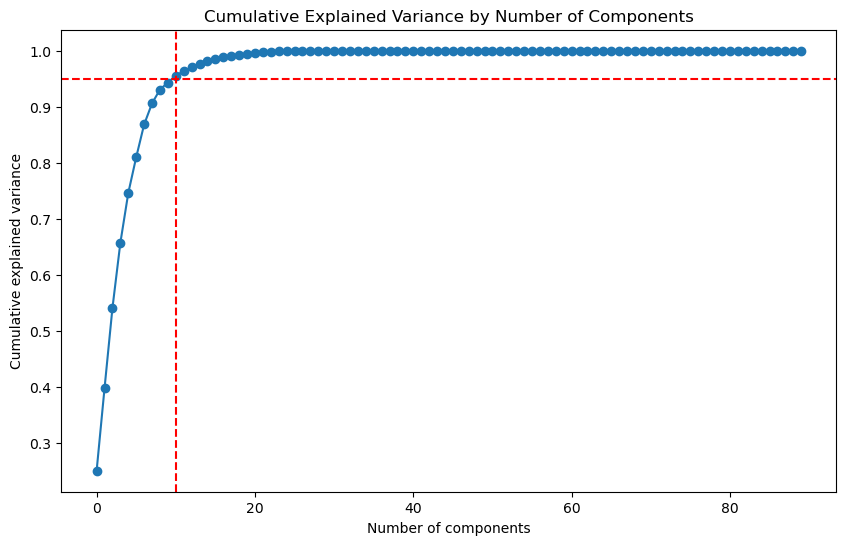

Chance Results:
Avg Accuracy: 0.51
Avg Weighted F1 Score: 0.51
Avg Precision_1: 0.45
Avg Recall_1: 0.47
Avg AUROC: 0.42
Avg Confusion Matrix:
[[12.4 10.6]
 [ 9.4  8.2]]
Avg Prediction Rate: 0.46

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.50
Avg Weighted F1 Score: 0.49
Avg Precision_1: 0.44
Avg Recall_1: 0.39
Avg AUROC: 0.47
Avg Confusion Matrix:
[[13.2  9.8]
 [10.6  7. ]]
Avg Prediction Rate: 0.41

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

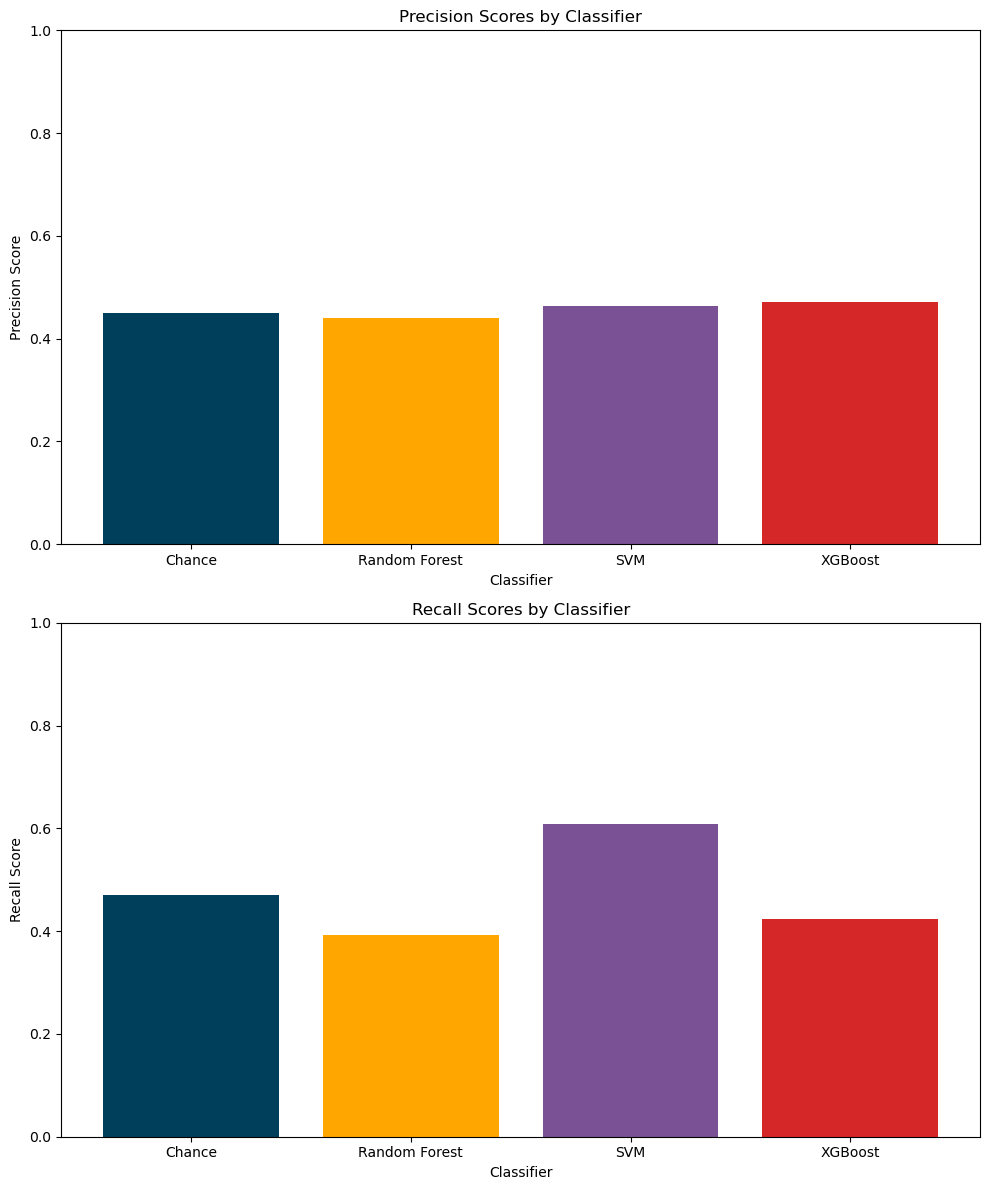

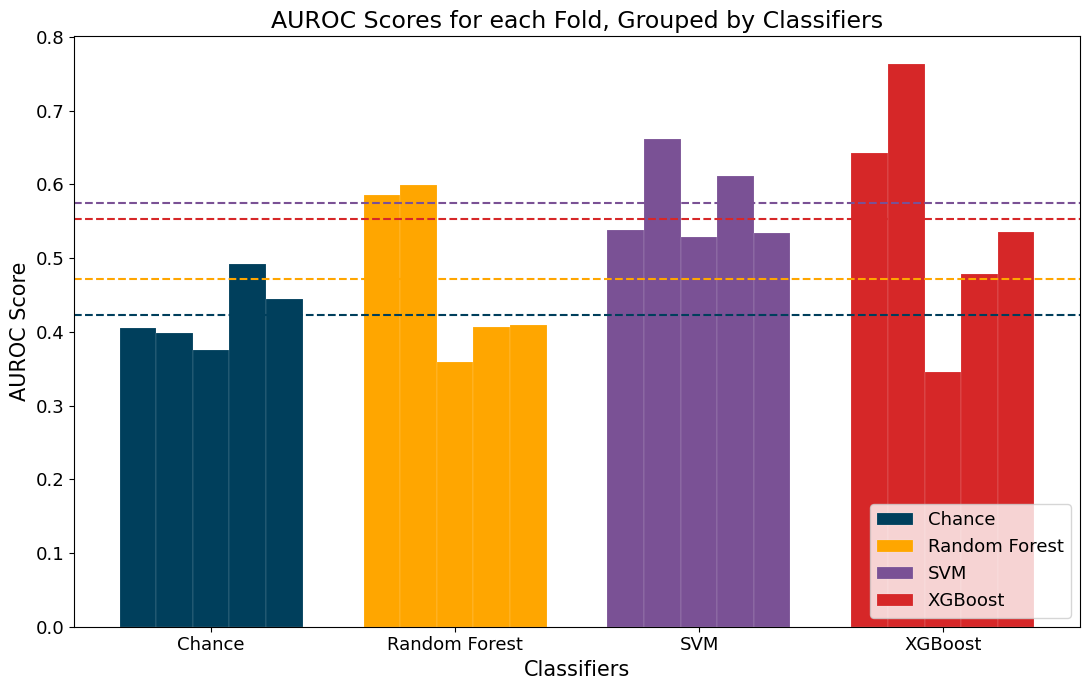

In [44]:
#AUROC
# Preparing the data
X = df_d6.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

y = df_d6['TUT']

# Identify majority and minority classes
majority_class = df_d6['TUT'].value_counts().idxmax()
minority_class = df_d6['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = df_d6[df_d6['TUT'] == majority_class].index
minority_indices = df_d6[df_d6['TUT'] == minority_class].index

# precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Fit PCA to determine the number of components that explain 95% of the variance
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# Plot cumulative explained variance to visually inspect
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=df_d6['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


## Prefer not to respond 
Data is too small to run model on. There are just 4 participants in this data and errors keep arising as a result. One example error was that the number of splits (5) is more than the number of groups (4). It also encounters the problem of having only one class in the y variable in a cross validation fold.

In [15]:
# #AUROC
# # Preparing the data
# X = df_d7.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

# y = df_d7['TUT']

# # Identify majority and minority classes
# majority_class = df_d7['TUT'].value_counts().idxmax()
# minority_class = df_d7['TUT'].value_counts().idxmin()
# print("Majority class", majority_class)
# print("Minority class", minority_class)

# # Separate majority and minority class samples
# majority_indices = df_d7[df_d7['TUT'] == majority_class].index
# minority_indices = df_d7[df_d7['TUT'] == minority_class].index

# # precision_scorer = make_scorer(precision_score)

# plt.figure(figsize=(11, 7)) 

# precision_dict = {}
# recall_dict = {}

# # List of classifiers
# classifiers = {
#     'Chance': DummyClassifier(strategy="stratified"),
#     "Random Forest": RandomForestClassifier(n_estimators=100),
#     "SVM": SVC(random_state=42, probability=True), 
#     "XGBoost": xgb.XGBClassifier(random_state=42)
# }
# auroc_score_barplot = {name: [] for name in classifiers}

# # Fit PCA to determine the number of components that explain 95% of the variance
# pca = PCA().fit(X)
# # cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# n_components = np.argmax(cumulative_variance >= 0.95) + 1
# print(f'Number of components that explain 95% of the variance: {n_components}')

# # Plot cumulative explained variance to visually inspect
# plt.figure(figsize=(10, 6))
# plt.plot(cumulative_variance, marker='o')
# plt.axhline(y=0.95, color='r', linestyle='--')
# plt.axvline(x=n_components - 1, color='r', linestyle='--')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title('Cumulative Explained Variance by Number of Components')
# plt.show()

# # Parameters for tuning classifiers
# param_grid_RF = {
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [10, 20],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [50, 100, 200],
#     }

# param_grid_SVM = {
#     'C': [0.1, 1, 10],
# #     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['linear']
# }
    

# param_grid_XGB = {
#     'colsample_bytree': [0.8, 1.0],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [10, 20],
#     'min_child_weight': [1, 3, 5],
#     'n_estimators': [50, 100, 200],
#     'subsample': [0.8, 1.0],
# }

# param_grids = {
#     'Random Forest': param_grid_RF,
#     'SVM': param_grid_SVM,
#     'XGBoost': param_grid_XGB
# }

# # Number of unique groups
# n_groups = df_d7['Participant'].nunique()
# print (n_groups)
# # Define the number of folds for cross-validation and set it to be less than or equal to the number of groups
# n_splits = min(5, n_groups)

# # Define the GroupKFold object
# gkf = GroupKFold(n_splits=n_splits)

# # Loop through the classifiers
# for name, clf in classifiers.items():
#     # Initialize lists to store evaluation metrics for each fold
#     accuracy_scores = []
#     weighted_f1_scores = []
#     precision_scores = []
#     recall_scores = []
#     auroc_scores = []
#     confusion_matrices = []
#     prediction_rates = []

#     # Perform cross-validation
#     for train_index, test_index in gkf.split(X, y, groups=df_d7['Participant']):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         # Apply PCA on the training data
#         pca = PCA(n_components=n_components)
#         X_train_pca = pca.fit_transform(X_train)
#         X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
#         # Perform oversampling on minority class
#         smote = SMOTE()
#         X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
# #         print(f"Before SMOTE: {Counter(y_train)}")
# #         print(f"After SMOTE: {Counter(y_train_resampled)}")

#         # Apply the transformation to the test data
#         X_test_pca = pca.transform(X_test)
#         X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
#         # Perform hyperparamenter tuning and train classifiers on best parameters
#         if name != "Chance":
#             grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
#             grid.fit(X_train_resampled, y_train_resampled)
#             best_clf = grid.best_estimator_
#             best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
#             # Perform prediction on test data
#             y_pred = best_clf.predict(X_test_pca_df)

#             # Calculating predicted probabilities for AUROC
#             y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

#         else:
#             best_clf = clf.fit(X_train, y_train)
#             # Perform prediction on test data
#             y_pred = best_clf.predict(X_test)

#             # Calculating predicted probabilities for AUROC
#             y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


#         # Evaluation metrics
#         accuracy = accuracy_score(y_test, y_pred)
#         weighted_f1 = f1_score(y_test, y_pred, average='weighted')
#         precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
#         recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
#         auroc = roc_auc_score(y_test, y_pred_proba) 
#         confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#         prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
#         # Append evaluation metrics to lists
#         accuracy_scores.append(accuracy)
#         weighted_f1_scores.append(weighted_f1)
#         precision_scores.append(precision)
#         recall_scores.append(recall)
#         auroc_scores.append(auroc)
#         confusion_matrices.append(confusion_matrix)
#         prediction_rates.append(prediction_rate)

#         #barplot for AUROC
#         auroc_score_barplot[name].append(auroc)
        
    
#     # Calculate average evaluation metrics across all folds
#     avg_accuracy = np.mean(accuracy_scores)
#     avg_weighted_f1 = np.mean(weighted_f1_scores)
#     avg_precision = np.mean(precision_scores)
#     avg_recall = np.mean(recall_scores)
#     avg_auroc = np.mean(auroc_scores)
#     avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
#     avg_prediction_rate = np.mean(prediction_rates)

    
#     # Output the average evaluation metrics for each classifier
#     print(f"{name} Results:")
#     print(f"Avg Accuracy: {avg_accuracy:.2f}")
#     print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
#     print(f"Avg Precision_1: {avg_precision:.2f}")
#     print(f"Avg Recall_1: {avg_recall:.2f}")
#     print(f"Avg AUROC: {avg_auroc:.2f}")
#     print("Avg Confusion Matrix:")
#     print(avg_confusion_matrix)
#     print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

#     # Store the average precision and recall for each classifier in a dictionary
#     precision_dict[name] = avg_precision
#     recall_dict[name] = avg_recall
    

# # List of colors for each classifier
# colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# # Plot bar charts for precision and recall
# fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# # Precision plot
# ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
# ax[0].set_title('Precision Scores by Classifier')
# ax[0].set_xlabel('Classifier')
# ax[0].set_ylabel('Precision Score')
# ax[0].set_ylim([0, 1])

# # Recall plot
# ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
# ax[1].set_title('Recall Scores by Classifier')
# ax[1].set_xlabel('Classifier')
# ax[1].set_ylabel('Recall Score')
# ax[1].set_ylim([0, 1])

# plt.tight_layout()
# plt.show()


# # Plot bar chart for AUROC
# fig, ax = plt.subplots(figsize=(11, 7))
# bar_width = 0.15  
# gap_width = 0.05 

# bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

# for idx, name in enumerate(classifiers):
#     scores = auroc_score_barplot[name]
#     avg_score = np.mean(scores)
#     for fold_idx, score in enumerate(scores):
#         bar_pos = bar_positions[idx] + (fold_idx * bar_width)
#         ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
#                color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
#     ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
# ax.set_xlabel('Classifiers', fontsize=15)
# ax.set_ylabel('AUROC Score', fontsize=15)
# ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

# ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
# ax.set_xticklabels(classifiers.keys())

# # Increasing the font size for tick labels and legend
# ax.tick_params(axis='both', which='major', labelsize=13)


# ax.legend(loc='lower right', fontsize=13)

# plt.tight_layout()
# plt.show()


## I have never been diagnosed with any of the above

In [16]:
# #AUROC
# # Preparing the data
# X = df_d8.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

# y = df_d8['TUT']

# # Identify majority and minority classes
# majority_class = df_d8['TUT'].value_counts().idxmax()
# minority_class = df_d8['TUT'].value_counts().idxmin()
# print("Majority class", majority_class)
# print("Minority class", minority_class)

# # Separate majority and minority class samples
# majority_indices = df_d8[df_d8['TUT'] == majority_class].index
# minority_indices = df_d8[df_d8['TUT'] == minority_class].index

# # precision_scorer = make_scorer(precision_score)

# plt.figure(figsize=(11, 7)) 

# precision_dict = {}
# recall_dict = {}

# # List of classifiers
# classifiers = {
#     'Chance': DummyClassifier(strategy="stratified"),
#     "Random Forest": RandomForestClassifier(n_estimators=100),
#     "SVM": SVC(random_state=42, probability=True), 
#     "XGBoost": xgb.XGBClassifier(random_state=42)
# }
# auroc_score_barplot = {name: [] for name in classifiers}

# # Fit PCA to determine the number of components that explain 95% of the variance
# pca = PCA().fit(X)
# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# n_components = np.argmax(cumulative_variance >= 0.95) + 1
# print(f'Number of components that explain 95% of the variance: {n_components}')

# # Plot cumulative explained variance to visually inspect
# plt.figure(figsize=(10, 6))
# plt.plot(cumulative_variance, marker='o')
# plt.axhline(y=0.95, color='r', linestyle='--')
# plt.axvline(x=n_components - 1, color='r', linestyle='--')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title('Cumulative Explained Variance by Number of Components')
# plt.show()

# # Parameters for tuning classifiers
# param_grid_RF = {
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [10, 20],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [50, 100, 200],
#     }

# param_grid_SVM = {
#     'C': [0.1, 1, 10],
# #     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['linear']
# }
    

# param_grid_XGB = {
#     'colsample_bytree': [0.8, 1.0],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [10, 20],
#     'min_child_weight': [1, 3, 5],
#     'n_estimators': [50, 100, 200],
#     'subsample': [0.8, 1.0],
# }

# param_grids = {
#     'Random Forest': param_grid_RF,
#     'SVM': param_grid_SVM,
#     'XGBoost': param_grid_XGB
# }

# # Define the number of folds for cross-validation
# n_splits = 5

# # Define the GroupKFold object
# gkf = GroupKFold(n_splits=n_splits)

# # Loop through the classifiers
# for name, clf in classifiers.items():
#     # Initialize lists to store evaluation metrics for each fold
#     accuracy_scores = []
#     weighted_f1_scores = []
#     precision_scores = []
#     recall_scores = []
#     auroc_scores = []
#     confusion_matrices = []
#     prediction_rates = []

#     # Perform cross-validation
#     for train_index, test_index in gkf.split(X, y, groups=df_d8['Participant']):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         # Apply PCA on the training data
#         pca = PCA(n_components=n_components)
#         X_train_pca = pca.fit_transform(X_train)
#         X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
#         # Perform oversampling on minority class
#         smote = SMOTE()
#         X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
# #         print(f"Before SMOTE: {Counter(y_train)}")
# #         print(f"After SMOTE: {Counter(y_train_resampled)}")

#         # Apply the transformation to the test data
#         X_test_pca = pca.transform(X_test)
#         X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
#         # Perform hyperparamenter tuning and train classifiers on best parameters
#         if name != "Chance":
#             grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
#             grid.fit(X_train_resampled, y_train_resampled)
#             best_clf = grid.best_estimator_
#             best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
#             # Perform prediction on test data
#             y_pred = best_clf.predict(X_test_pca_df)

#             # Calculating predicted probabilities for AUROC
#             y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

#         else:
#             best_clf = clf.fit(X_train, y_train)
#             # Perform prediction on test data
#             y_pred = best_clf.predict(X_test)

#             # Calculating predicted probabilities for AUROC
#             y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


#         # Evaluation metrics
#         accuracy = accuracy_score(y_test, y_pred)
#         weighted_f1 = f1_score(y_test, y_pred, average='weighted')
#         precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
#         recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
#         auroc = roc_auc_score(y_test, y_pred_proba) 
#         confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#         prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
#         # Append evaluation metrics to lists
#         accuracy_scores.append(accuracy)
#         weighted_f1_scores.append(weighted_f1)
#         precision_scores.append(precision)
#         recall_scores.append(recall)
#         auroc_scores.append(auroc)
#         confusion_matrices.append(confusion_matrix)
#         prediction_rates.append(prediction_rate)

#         #barplot for AUROC
#         auroc_score_barplot[name].append(auroc)
        
    
#     # Calculate average evaluation metrics across all folds
#     avg_accuracy = np.mean(accuracy_scores)
#     avg_weighted_f1 = np.mean(weighted_f1_scores)
#     avg_precision = np.mean(precision_scores)
#     avg_recall = np.mean(recall_scores)
#     avg_auroc = np.mean(auroc_scores)
#     avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
#     avg_prediction_rate = np.mean(prediction_rates)

    
#     # Output the average evaluation metrics for each classifier
#     print(f"{name} Results:")
#     print(f"Avg Accuracy: {avg_accuracy:.2f}")
#     print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
#     print(f"Avg Precision_1: {avg_precision:.2f}")
#     print(f"Avg Recall_1: {avg_recall:.2f}")
#     print(f"Avg AUROC: {avg_auroc:.2f}")
#     print("Avg Confusion Matrix:")
#     print(avg_confusion_matrix)
#     print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

#     # Store the average precision and recall for each classifier in a dictionary
#     precision_dict[name] = avg_precision
#     recall_dict[name] = avg_recall
    

# # List of colors for each classifier
# colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# # Plot bar charts for precision and recall
# fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# # Precision plot
# ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
# ax[0].set_title('Precision Scores by Classifier')
# ax[0].set_xlabel('Classifier')
# ax[0].set_ylabel('Precision Score')
# ax[0].set_ylim([0, 1])

# # Recall plot
# ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
# ax[1].set_title('Recall Scores by Classifier')
# ax[1].set_xlabel('Classifier')
# ax[1].set_ylabel('Recall Score')
# ax[1].set_ylim([0, 1])

# plt.tight_layout()
# plt.show()


# # Plot bar chart for AUROC
# fig, ax = plt.subplots(figsize=(11, 7))
# bar_width = 0.15  
# gap_width = 0.05 

# bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

# for idx, name in enumerate(classifiers):
#     scores = auroc_score_barplot[name]
#     avg_score = np.mean(scores)
#     for fold_idx, score in enumerate(scores):
#         bar_pos = bar_positions[idx] + (fold_idx * bar_width)
#         ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
#                color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
#     ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
# ax.set_xlabel('Classifiers', fontsize=15)
# ax.set_ylabel('AUROC Score', fontsize=15)
# ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

# ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
# ax.set_xticklabels(classifiers.keys())

# # Increasing the font size for tick labels and legend
# ax.tick_params(axis='both', which='major', labelsize=13)


# ax.legend(loc='lower right', fontsize=13)

# plt.tight_layout()
# plt.show()


## Merging two data - "Prefer not to respond" and "I have never been diagnosed with any listed diagnosis" 

In [17]:
d7_d8 = pd.concat((df_d7, df_d8), ignore_index=True)
d7_d8

,Participant,Paragraph,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,PP_3_JJS,PP_3_MD,PP_3_VB,PP_3_RB,PP_3_VBZ,PP_3_RBS,PP_3_JJR,PP_3_WRB,PP_3_RBR,TUT
0,5b07b71c68eff50001d1c859,4,-0.603115,-0.760665,0.730738,0.517160,-0.890047,-0.838912,0.152591,-0.002734,...,0.0,-0.408349,-0.632643,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,0
1,5b07b71c68eff50001d1c859,10,-0.944236,-0.751543,-0.261507,-0.394614,-0.706923,-0.814176,0.444325,0.249157,...,0.0,-0.408349,-0.632643,-0.935216,0.407957,0.0,-0.408349,-0.408349,0.0,0
2,5b07b71c68eff50001d1c859,15,-0.886534,-0.602557,-0.547080,-0.614850,-0.941487,-0.533837,-0.546471,-0.607271,...,0.0,-0.408349,1.580670,0.935216,2.312831,0.0,2.448884,-0.408349,0.0,0
3,5b07b71c68eff50001d1c859,20,-0.613298,-0.249856,-0.566441,-0.522351,-1.038193,-0.727601,-0.590506,-0.692914,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,-0.408349,0.0,1
4,5b07b71c68eff50001d1c859,26,-0.635360,-0.611679,0.183793,0.125141,-0.890047,-0.558573,-0.496931,-0.526666,...,0.0,-0.408349,-0.632643,1.870432,-0.544481,0.0,-0.408349,-0.408349,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,63052f20afc39e87110eb83e,15,0.043488,-0.636003,-0.092100,-0.214021,1.025559,-0.125697,1.038803,0.803317,...,0.0,-0.408349,1.580670,0.935216,2.312831,0.0,2.448884,-0.408349,0.0,1
187,63052f20afc39e87110eb83e,20,2.051181,1.246085,-0.125981,0.006214,-0.408574,-0.706987,-0.133639,-0.219359,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,-0.408349,0.0,0
188,63052f20afc39e87110eb83e,26,1.212804,1.534935,-0.106620,-0.064261,1.165474,0.727686,0.081033,0.526237,...,0.0,-0.408349,-0.632643,1.870432,-0.544481,0.0,-0.408349,-0.408349,0.0,0
189,63052f20afc39e87110eb83e,31,0.673119,-0.660327,1.669740,1.719645,1.840360,0.822507,1.088343,1.382665,...,0.0,2.448884,1.580670,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,0


Majority class 0
Minority class 1
Number of components that explain 95% of the variance: 11


<Figure size 1100x700 with 0 Axes>

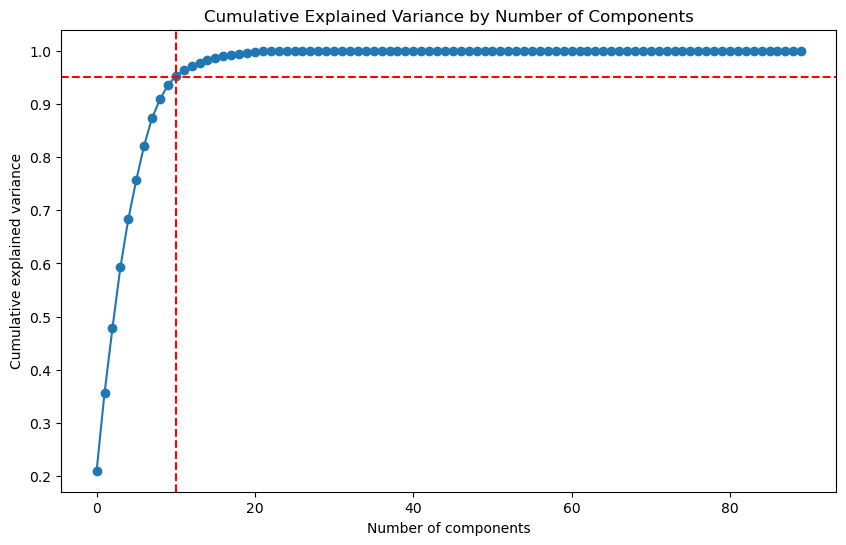

Chance Results:
Avg Accuracy: 0.61
Avg Weighted F1 Score: 0.61
Avg Precision_1: 0.29
Avg Recall_1: 0.34
Avg AUROC: 0.51
Avg Confusion Matrix:
[[19.8  8. ]
 [ 7.2  3.2]]
Avg Prediction Rate: 0.29

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.64
Avg Weighted F1 Score: 0.64
Avg Precision_1: 0.32
Avg Recall_1: 0.31
Avg AUROC: 0.50
Avg Confusion Matrix:
[[20.8  7. ]
 [ 6.8  3.6]]
Avg Prediction Rate: 0.28

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

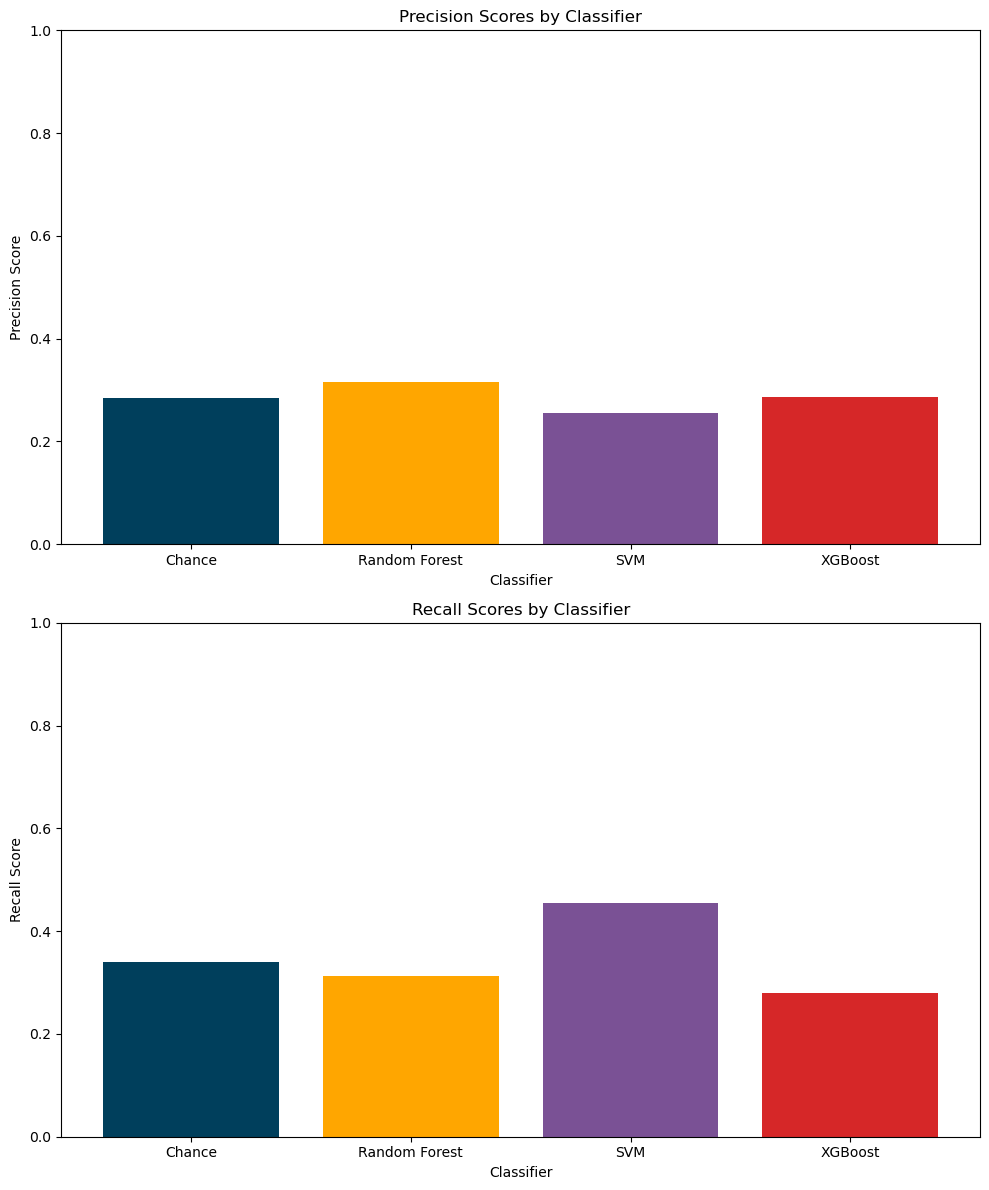

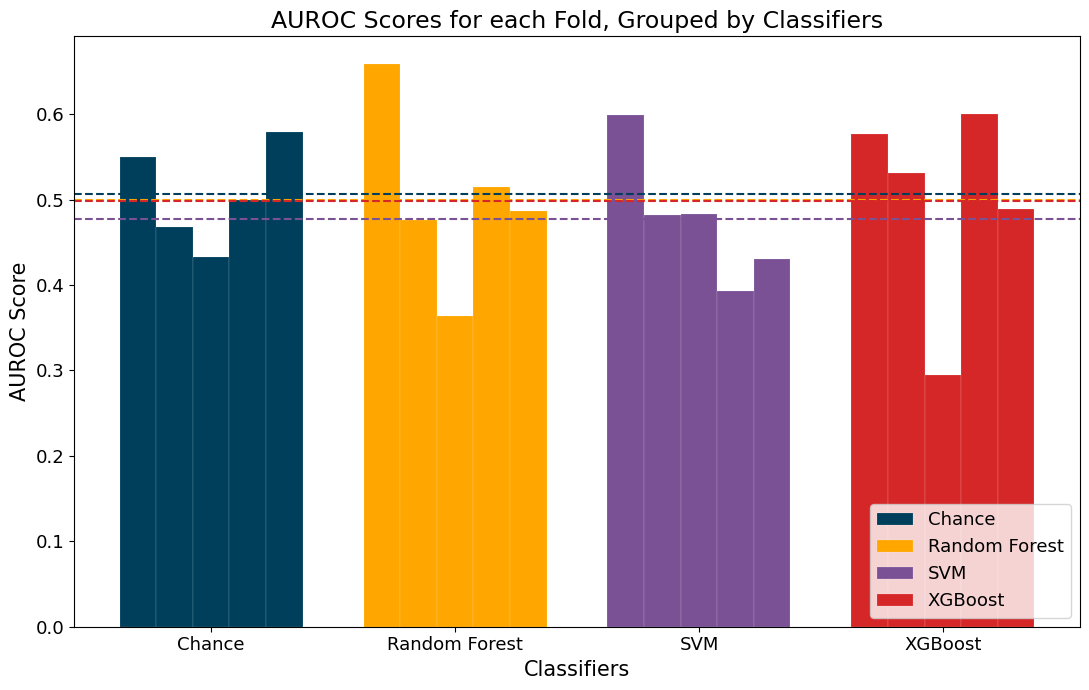

In [18]:
#AUROC
# Preparing the data
X = d7_d8.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

y = d7_d8['TUT']

# Identify majority and minority classes
majority_class = d7_d8['TUT'].value_counts().idxmax()
minority_class = d7_d8['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = d7_d8[d7_d8['TUT'] == majority_class].index
minority_indices = d7_d8[d7_d8['TUT'] == minority_class].index

# precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Fit PCA to determine the number of components that explain 95% of the variance
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# Plot cumulative explained variance to visually inspect
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=d7_d8['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


# Number of participants, instances and base rate

In [31]:
# List of DataFrames
dataframes = [df_d1, df_d2, df_d3, df_d4, df_d5, df_d6, df_d7, df_d8, d7_d8]

def calculate_statistics(df, label_column='TUT'):
    num_participants = df['Participant'].nunique()
    num_instances = len(df)
    positive_class_percentage = (df[label_column].sum() / num_instances) * 100
    return num_participants, num_instances, positive_class_percentage

for i, df in enumerate(dataframes, start=1):
    num_participants, num_instances, positive_percentage = calculate_statistics(df)
    print(f"Dataset D{i}:")
    print(f"  Number of participants = {num_participants}")
    print(f"  Number of instances = {num_instances}")
    print(f"  Base rate = {positive_percentage:.2f}%\n")

Dataset D1:
  Number of participants = 68
  Number of instances = 428
  Base rate = 50.00%

Dataset D2:
  Number of participants = 60
  Number of instances = 389
  Base rate = 44.99%

Dataset D3:
  Number of participants = 13
  Number of instances = 77
  Base rate = 55.84%

Dataset D4:
  Number of participants = 13
  Number of instances = 76
  Base rate = 43.42%

Dataset D5:
  Number of participants = 81
  Number of instances = 492
  Base rate = 43.50%

Dataset D6:
  Number of participants = 32
  Number of instances = 203
  Base rate = 43.35%

Dataset D7:
  Number of participants = 4
  Number of instances = 23
  Base rate = 34.78%

Dataset D8:
  Number of participants = 26
  Number of instances = 168
  Base rate = 26.19%

Dataset D9:
  Number of participants = 30
  Number of instances = 191
  Base rate = 27.23%

